# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import itertools
%matplotlib inline

In [8]:
cars = pd.read_csv("homework/linear-regression/car_data.csv")
cars.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [9]:
miles = cars[["Mileage"]]
price = cars["Price"]
regr1 = lm.LinearRegression()
regr1.fit(miles, price)
print("Coefficient =", regr1.coef_, "Y-intercept =", regr1.intercept_)

Coefficient = [-0.1725205] Y-intercept = 24764.5590061


(Note: The Y-intercept on price is eerily similar to the Y-intercept for the salary case in the linear-regression assignment.)

R^2 = 0.0204634473235


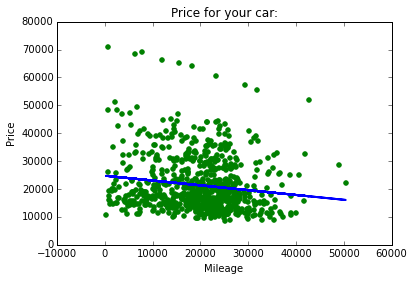

In [10]:
cars.plot(kind="scatter", x="Mileage", y="Price", title="Price for your car:", color="green")
plt.plot(miles, regr1.predict(miles), color='blue', linewidth=2)
print("R^2 =", regr1.score(miles, price))

Notes: This is a very weak relationship (R^2 = 0.02). I am curious about the outliers (the expensive cars at the top).

## Attempted to code non-quantifiable features:

In [223]:
def get_dict(col):
    words = col.unique()
    length = len(col.unique())
    values = list(range(length))
    make_dict = {}
    counter = 0
    for i in words:
        counter += 1
        make_dict[i] = counter
    return make_dict
    
trim_code = get_dict(cars.Trim)
make_code = get_dict(cars.Make)
model_code = get_dict(cars.Model)
type_code = get_dict(cars.Type)
print(trim_code)

'def get_dict(col):\n    words = col.unique()\n    length = len(col.unique())\n    values = list(range(length))\n    make_dict = {}\n    counter = 0\n    for i in words:\n        counter += 1\n        make_dict[i] = counter\n    return make_dict\n    \ntrim_code = get_dict(cars.Trim)\nmake_code = get_dict(cars.Make)\nmodel_code = get_dict(cars.Model)\ntype_code = get_dict(cars.Type)\nprint(trim_code)'

In [224]:
"""for key, value in trim_code:
    cars.replace(key, value)
cars.head()"""

ValueError: too many values to unpack (expected 2)

In [225]:
quant_cars = cars[['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
car_price = cars["Price"]
regr2 = lm.LinearRegression()
regr2.fit(quant_cars, car_price)
print('Coefficient: ', regr2.coef_)
print("Y-Intercept: ", regr2.intercept_)

Coefficient:  [  1.00000000e+00  -1.11022302e-16   1.58869296e-14  -4.09792405e-14
   2.22201611e-14  -7.89708773e-14  -1.16733931e-13  -8.28518685e-14]
Y-Intercept:  7.27595761418e-12


In [226]:
dv = list(quant_cars.columns)
dv.remove("Price")
combos = list(itertools.combinations(dv, 2))
print(len(combos))

21


In [227]:
def regression_for(combo):
    combo = list(combo)
    df = cars.loc[:, combo + ["Price"]]
    df.dropna(inplace=True)
    input_data = df[combo]
    price2 = df["Price"]
    regr3 = lm.LinearRegression()
    regr3.fit(input_data, price2)
    return regr3, regr3.score(input_data, price2)

regression_for(combos[1])

/Users/travisknop/travis_python/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 0.32912790668541569)

In [228]:
options = []
def get_variables(combos):
    for combo in combos:
        regr_for, score = regression_for(combo)
        options.append((combo, score))
    best = sorted(options, key = lambda x: x[1])[-1]
    regr_for, score = regression_for(best[0])    
    print(best)
    print()
        
get_variables(combos)
#print(sorted(options, key = lambda x: x[1]))

(('Cylinder', 'Cruise'), 0.38394913240273443)



No combination of factors produces a result that explains even half of the sale price of a used GM car. Most likely, other factors such as accident history, or make and model affect the depreciation more.